In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd

import HELP
get_model = HELP.get_model
make_spotmodel = HELP.make_spotmodel
Dotter_rad = HELP.Dotter_rad
MagConvert = HELP.MagConvert
V_VKPlotData = HELP.V_VKPlotData
PleiadesDeltaV_VK = HELP.PleiadesDeltaV_VK
CMDData = HELP.CMDData
DeltaVfunc = HELP.DeltaVfunc

import getMag
getMag = getMag.getMag

import getMag_hires
getMag_hires = getMag_hires.getMag_hires

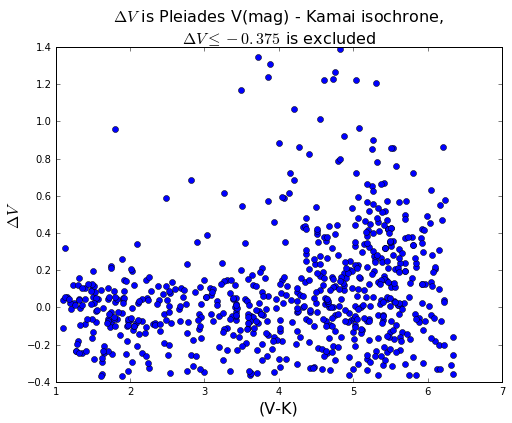

In [2]:
PleiaVK,DeltV = PleiadesDeltaV_VK('V-K','V')

plt.figure(figsize=(8,6))
plt.plot(PleiaVK,DeltV,'o')
plt.title('$\Delta V$ is Pleiades V(mag) - Kamai isochrone,\n$\Delta V\leq -0.375$ is excluded',fontsize=16)
plt.xlabel('(V-K)',fontsize=16)
plt.ylabel('$\Delta V$',fontsize=16)

In [3]:
PhMax = 7000
PhMin = 3600
SpTempFrac = SpTempFrac = np.arange(1.,0.79,-0.05)
FillFactor = 0.8 #np.arange(0,0.501,0.05)

Vmags = []
VKmags = []
for i in range(len(SpTempFrac)):
    x = V_VKPlotData(PhMax,PhMin,SpTempFrac[i],FillFactor)
    Vmags.append(x[0])
    VKmags.append(x[1])
#Vmags and VKmags filled with sets of magnitudes over photospheric temperature range. Sets follow range of
#filling factor at a constant 80% spot temperature relative to the photospheric temp.



In [4]:
KamaiIsochrone = open('data/Kamai_Isochrone.tbl','r')
names = KamaiIsochrone.readline().split
KamaiIsochrone.close()
KamaiIsochrone = pd.read_table('data/Kamai_Isochrone.tbl',sep=None,engine='python')

KamaiV = [i-5.67 for i in KamaiIsochrone['V']]
KamaiVK = KamaiIsochrone['V - K']

/Users/saethen/anaconda/lib/python3.5/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


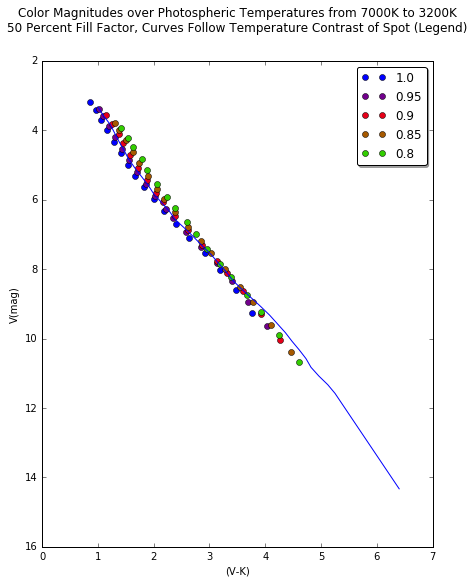

In [5]:
plt.figure(figsize=(7,10))
colormap = plt.cm.brg
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0,0.9,len(SpTempFrac))])


for i in range(len(SpTempFrac)):
    plt.plot(VKmags[i],Vmags[i],'o')
plt.plot(KamaiVK,KamaiV)

plt.tight_layout
plt.gca().invert_yaxis()
plt.subplots_adjust(top=0.8)

plt.legend(SpTempFrac,fancybox=True,shadow=True)
plt.xlabel('(V-K)')
plt.ylabel('V(mag)')
plt.title('Color Magnitudes over Photospheric Temperatures from 7000K to 3200K\n50 Percent Fill Factor, Curves Follow Temperature Contrast of Spot (Legend)',y=1.05)

In [6]:
Vmags = np.asarray(Vmags)
VKmags = np.asarray(VKmags)
VK = []
DeltaV = []
for i in range(len(Vmags)):
    x = DeltaVfunc(VKmags[i],Vmags[i])
    VK.append([i[0] for i in x])
    DeltaV.append([i[1] for i in x])

/Users/saethen/anaconda/lib/python3.5/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


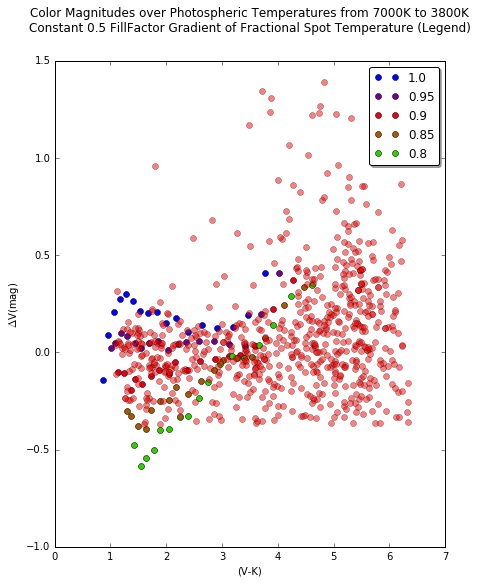

In [7]:
plt.figure(figsize=(7,10))
colormap = plt.cm.brg
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0,0.9,len(VK))])


for i in range(len(VK)):
    plt.plot(VK[i],DeltaV[i],'o')
plt.plot(PleiaVK,DeltV,'ro',alpha=0.5)

plt.tight_layout
plt.subplots_adjust(top=0.8)

plt.legend(SpTempFrac,fancybox=True,shadow=True,loc='best')
plt.xlabel('(V-K)')
plt.ylabel('$\Delta$V(mag)')
plt.title('Color Magnitudes over Photospheric Temperatures from 7000K to 3800K\nConstant 0.5 FillFactor Gradient of Fractional Spot Temperature (Legend)',y=1.05)

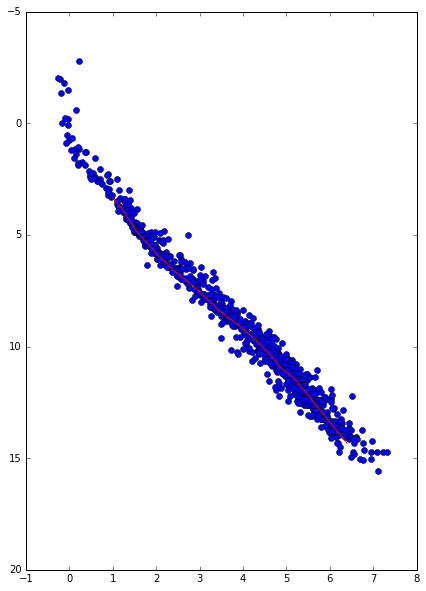

In [8]:
#Testing a new general function to grab Pleiades magnitudes

PleiaK,PleiaV = CMDData('K','V')
PleiaVKinit = [i-j for i,j in zip(PleiaV,PleiaK)]

plt.figure(figsize=(7,10))
plt.plot(PleiaVKinit,PleiaV,'o',KamaiVK,KamaiV,'r-')
plt.gca().invert_yaxis()